소개<br>

리그 오브 레전드(LoL)는 라이엇 게임즈가 마이크로소프트 윈도와 macOS를 위해 개발하고 발행한 멀티플레이어 온라인 배틀 아레나 비디오 게임이다. 리그 오브 레전드에서, 선수들은 독특한 능력을 가진 "챔피언"의 역할을 맡고, 다른 선수 혹은 컴퓨터 제어 챔피언 팀과 싸운다. 다른 뚜렷한 게임 모드도 다양한 목표, 규칙, 지도와 함께 존재하지만 상대 팀의 "넥서스"를 파괴하는 것이 목표다. 각 리그 오브 레전드 경기는 별개의 시합으로, 모든 챔피언들이 비교적 약하게 출발하지만 경기 과정 동안 아이템과 경험을 축적함으로써 힘을 증가시킨다. 이 데이터 집합은 처음 10분을 포함한다. 높은 ELO(DIAMOND I to MASTER)에서 약 10k 순위 게임(SOLO QUME)의 통계. 선수들은 대략 같은 수준을 가지고 있다. 경기 시작 10분 만에 수집한 피쳐는 팀당 19개(총 38개)에 이른다. 여기에는 살인, 사망, 금, 경험, 레벨 등이 포함된다. 더 많은 통찰력을 얻기 위해 특성 공학을 하는 것은 여러분에게 달려있다. blueWins 열은 목표값(예측하려는 값)이다. 값이 1이면 블루팀이 이겼다는 뜻이다. 이 노트북은 어떤 기능이 우승과 더 상관관계가 있는지 예측하는 데 목적이 있다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving high_diamond_ranked_10min.csv to high_diamond_ranked_10min.csv
User uploaded file "high_diamond_ranked_10min.csv" with length 1446502 bytes


In [0]:
%matplotlib inline
sns.set_style("darkgrid")

In [4]:
# Load Dataset

data = pd.read_csv('high_diamond_ranked_10min.csv')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


#EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [0]:
df_clean = data.copy()

In [0]:
# Drop some unecessary columns. e.g. blueFirstblood/redfirst blood blueEliteMonster/redEliteMonster blueDeath/redKills etc are repeated
# Based on personal experience with the game, mimion yield gold+experience, we can drop minion kill too
cols = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled']
df_clean = df_clean.drop(cols, axis = 1)

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


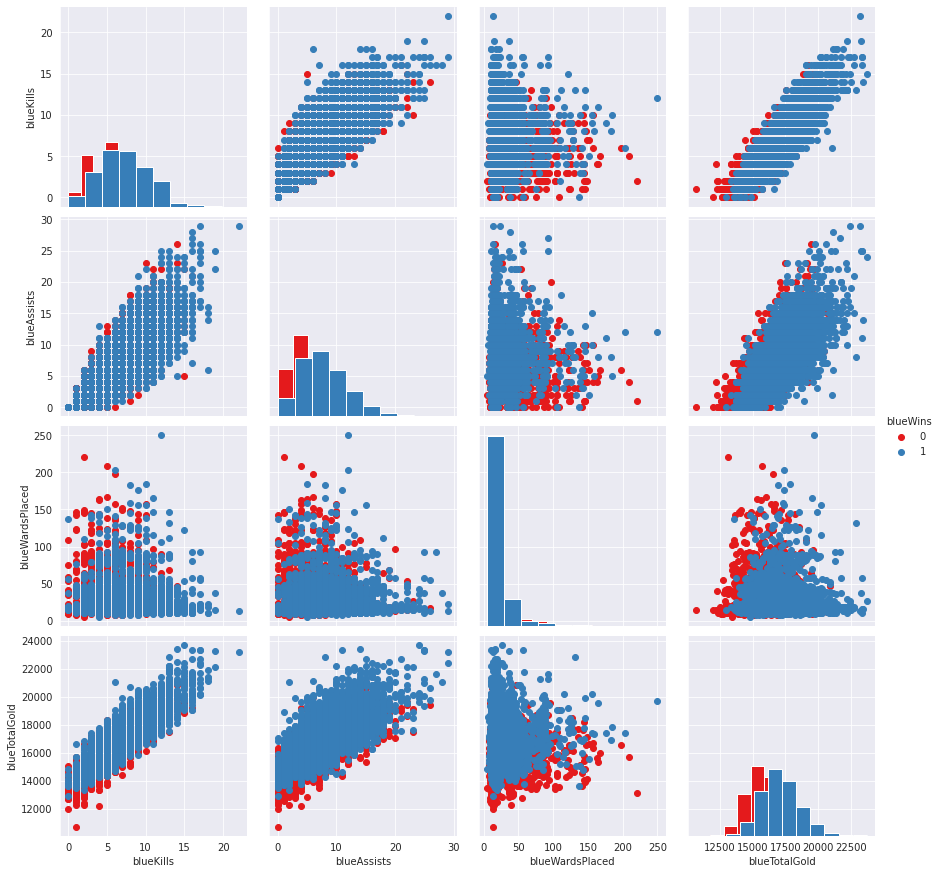

In [10]:
# Next let's check the relationship between parameters of blue team features
g = sns.PairGrid(data=df_clean, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', size=3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [0]:
#We can see a lot of co-linearity between variables



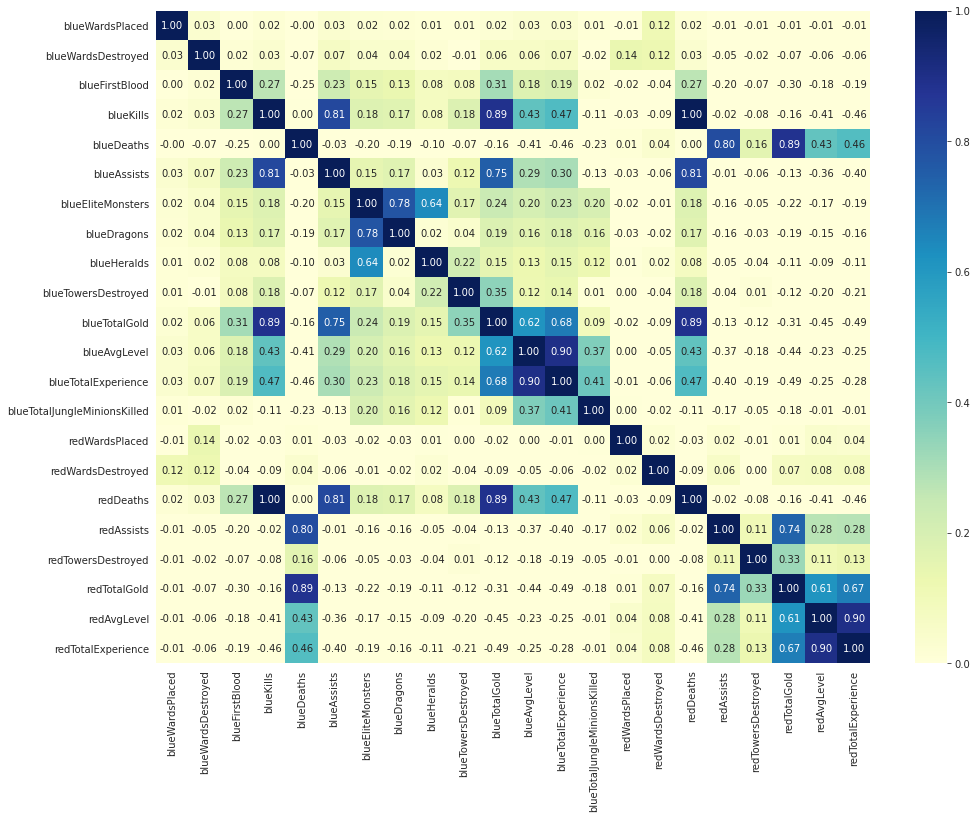

In [11]:
# We can see that a lot of the features are highly correlated, let's get the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(df_clean.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [0]:
# Based on the correlation matrix, let's clean the dataset a little bit more to avoid colinearity
cols = ['blueAvgLevel', 'redWardsPlaced', 'redWardsDestroyed', 'redDeaths', 'redAssists', 'redTowersDestroyed',
       'redTotalExperience', 'redTotalGold', 'redAvgLevel']
df_clean = df_clean.drop(cols, axis=1)

In [13]:
# Next let's drop the columns has little correlation with bluewins
corr_list = df_clean[df_clean.columns[1:]].apply(lambda x: x.corr(df_clean['blueWins']))
cols = []
for col in corr_list.index:
    if (corr_list[col]>0.2 or corr_list[col]<-0.2):
        cols.append(col)
cols

['blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueTotalGold',
 'blueTotalExperience']

In [14]:
df_clean = df_clean[cols]

df_clean.head()

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,1,9,6,11,0,0,17210,17039
1,0,5,5,5,0,0,14712,16265
2,0,7,11,4,1,1,16113,16221
3,0,4,5,5,1,0,15157,17954
4,0,6,6,6,0,0,16400,18543


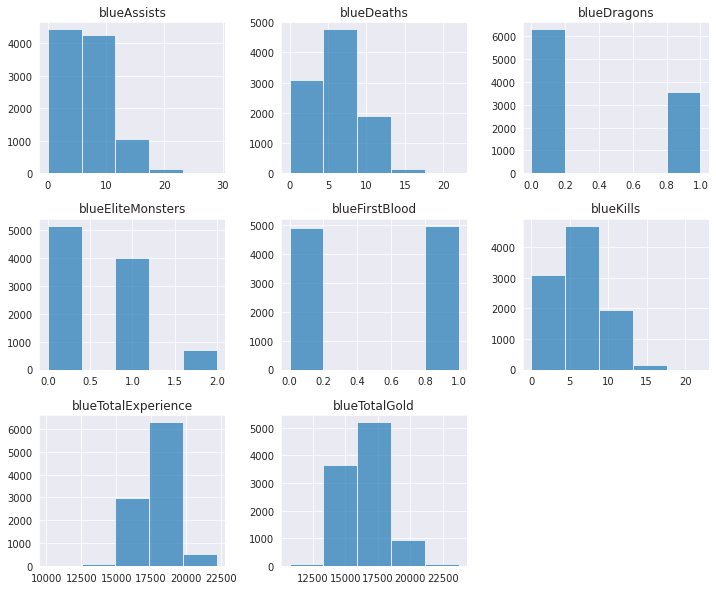

In [15]:
df_clean.hist(alpha = 0.7, figsize=(12,10), bins=5);

#Model Selection

In [0]:
# train test split scale the set
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X = df_clean
y = data['blueWins']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bayes


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# fit the model
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

pred_nb = clf_nb.predict(X_test)


# get the accureacy score
acc_nb = accuracy_score(pred_nb, y_test)

print(acc_nb)


0.7176113360323887


# Decision Tree

In [0]:
from sklearn import 
from sklearn.model_selection import GridSearchCV

tree = tree.DecisionTreeClassifier()

#search the best params

gird = {'min_samples_split': [5, 10, 20, 50, 100]},

clf_tree = G

